In [8]:
## Import packages

# Data analysis and wrangling
import pandas as pd  
import numpy as np 
from matplotlib import pyplot as plt
import warnings

# Model creation and evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import plot_confusion_matrix
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE

warnings.filterwarnings('ignore')
%matplotlib inline

In [9]:
# Load the data
student_data = pd.read_csv('/Users/ankushkhullar/Desktop/TRIAD/input/test_data.tsv', sep='\t')

In [10]:
# Map categorical and binary variables to integers
student_data = student_data.drop(['first', 'last', 'notes'], axis=1)
student_data['sex'] = student_data['sex'].map({'Male': 1, 'Female': 0})
student_data[['dojo_class', 'test_prep', 'pass']] = student_data[['dojo_class', 'test_prep', 'pass']].astype(int)

# Standardize continuous variables
student_data[['age', 'hours_studied']] = preprocessing.scale(student_data[['age', 'hours_studied']])

# Impute missing hours_studied values
data_to_impute = student_data.drop('pass', axis=1)
data_to_impute = pd.get_dummies(data_to_impute)

knn_imputer = KNNImputer(n_neighbors=5)
knn_imputed = knn_imputer.fit_transform(data_to_impute)
knn_imputed = pd.DataFrame(knn_imputed)
knn_imputed.columns = data_to_impute.columns

student_data['hours_studied'] = knn_imputed['hours_studied']

# Drop uneccessary variables
student_data = student_data.drop(['country', 'lang', 'test_prep'], axis=1)

The accuracy of the random forest model is 90.7%


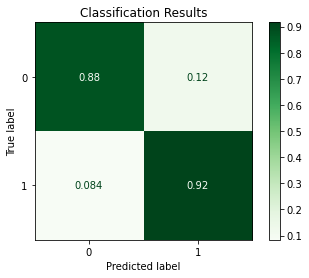

In [12]:
# Split predictors and target
X = student_data.drop('pass', axis=1)
y = student_data['pass']

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

# Run SMOTE algorithm on training set
sampler = SMOTE(random_state=2)
X_train_smote, y_train_smote = sampler.fit_sample(X, y)

# Initialize and fit random forest model
rf = RandomForestClassifier(random_state=2)
rf.fit(X_train_smote, y_train_smote)

# Assess accuracy of model on test set
accuracy = rf.score(X_test, y_test)
print('The accuracy of the random forest model is {:.1%}'.format(accuracy))

plot_confusion_matrix(rf, X_test, y_test, normalize='true', cmap=plt.cm.Greens)
plt.title('Classification Results')
plt.show()